# Indexing, Slicing and Subsetting DataFrames in Python

In lesson 01, we read a CSV into a python Pandas DataFrame.  We learned how to
save the DataFrame to a named object, how to perform basic math on the data, how
to calculate summary statistics and how to create plots of the data. In this
lesson, we will explore ways to access different parts of the data using indexing,
slicing and subsetting.

## Learning Objectives

*  Learn about 0-based indexing in Python.
*  Learn about numeric vs. label based indexes.
*  Learn how to select subsets of data from a DataFrame using Slicing and
   Indexing methods.
*  Understand what a boolean object is and how it can be used to "mask" or
   identify particular sets of values within another object.


## Making Sure Our Data Are Loaded

We will continue to use the surveys dataset that we worked with in the last
exercise. Let's reopen it:

```python
# first make sure pandas is loaded
import pandas as pd
# read in the survey csv
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")
```


In [11]:
import pandas as pd
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")

# surveys_df[['plot_id', 'species_id']]

# Indexing & Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (column headings),
numeric ranges or specific x,y index locations.


## Selecting Data Using Labels (Column Headings)

We use square brackets `[]` to select a subset of an Python object. For example,
we can select all of data from a column named `species_id` from the `surveys_df`
DataFrame by name:

```python
surveys_df['species_id']
# this syntax, calling the column as an attribute, gives you the same output
surveys_df.species_id
```

We can also create an new object that contains the data within the `species_id`
column as follows:

```python
# create an object named surveys_species that only contains the `species_id` column
surveys_species = surveys_df['species_id']
```

We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.

```python
# select the species and plot columns from the DataFrame
surveys_df[['species_id', 'plot_id']]
# what happens when you flip the order?
surveys_df[['plot_id', 'species_id']]
#what happens if you ask for a column that doesn't exist?
surveys_df['speciess']
```

## Extracting Range based Subsets: Slicing

**REMINDER**: Python Uses 0-based Indexing

Let's remind ourselves that Python uses 0-based
indexing. This means that the first element in an object is located at position
0. This is different from other tools like R and Matlab that index elements
within objects starting at 1.

```python
# Create a list of numbers:
a = [1,2,3,4,5]
```

![indexing diagram](../img/slicing-indexing.svg)
![slicing diagram](../img/slicing-slicing.svg)

## Challenges

1. What value does the code below return?
        a[0]
2. How about this:
        a[5]
3. Or this?
        a[len(a)]
4. In the example above, calling `a[5]` returns an error. Why is that?



In [17]:
a = [1,2,3,4,5]
a[1:3]
# Obrati pažnju, ide do 3, ali ne i 3!

[2, 3]

## Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this:

```python
# select rows 0,1,2 (but not 3)
surveys_df[0:3]
```

The stop bound in Python is different from what you might be used to in
languages like Matlab and R.

```python
# select the first, second and third rows from the surveys variable
surveys_df[0:3]
# select the first 5 rows (rows 0,1,2,3,4)
surveys_df[:5]
# select the last element in the list
surveys_df[-1:]
```

We can also reassign values within subsets of our DataFrame. But before we do that, let's make a 
copy of our DataFrame so as not to modify our original imported data. 

```python
# copy the surveys dataframe so we don't modify the original DataFrame
surveys_copy = surveys_df

# set the first three rows of data in the DataFrame to 0
surveys_copy[0:3] = 0
```

Next, try the following code: 

```python
surveys_copy.head()
surveys_df.head()
```
What is the difference between the two data frames?


In [59]:
import pandas as pd
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")

surveys_df[-1:]
surveys_copy = surveys_df.copy()

surveys_copy[0:3] = 0

surveys_copy.head()
# surveys_df.head().iloc[0:3, 1:4]

# surveys_df.iloc[0:3, 1:4]
# surveys_df.loc[[0, 10], :]
surveys_df.loc[0:3, :]
# surveys_df.loc[[0, 10], ['species_id', 'plot_id', 'weight']]
# surveys_df.loc[[0, 10, 35549], :]
# surveys_df.iloc[4, 3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [46]:
# 

## Referencing Objects vs Copying Objects in Python
We might have thought that we were creating a fresh copy of the `surveys_df` objects when we 
used the code `surveys_copy = surveys_df`. However the statement  y = x doesn’t create a copy of our DataFrame. 
It creates a new variable y that refers to the **same** object x refers to. This means that there is only one object 
(the DataFrame), and both x and y refer to it. So when we assign the first 3 columns the value of 0 using the 
`surveys_copy` DataFrame, the `surveys_df` DataFrame is modified too. To create a fresh copy of the `surveys_df`
DataFrame we use the syntax y=x.copy(). But before we have to read the surveys_df again because the current version contains the unintentional changes made to the first 3 columns.

```python
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")
surveys_copy= surveys_df.copy()

```

## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc`: indexing via *labels* or *integers*
- `iloc`: indexing via *integers*

To select a subset of rows AND columns from our DataFrame, we can use the `iloc`
method. For example, we can select month, day and year (columns 2, 3 and 4 if we
start counting at 1), like this:

```python
surveys_df.iloc[0:3, 1:4]
```

which gives **output**

```
   month  day  year
0      7   16  1977
1      7   16  1977
2      7   16  1977
```

Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.

Let's next explore some other ways to index and select subsets of data:

```python
# select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]
# what does this do?
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

# What happens when you type the code below?
surveys_df.loc[[0, 10, 35549], :]
```

NOTE: Labels must be found in the DataFrame or you will get a `KeyError`. The
start bound and the stop bound are **included**.  When using `loc`, integers
*can* also be used, but they refer to the index label and not the position. Thus
when you use `loc`, and select 1:4, you will get a different result than using
`iloc` to select rows 1:4.

We can also select a specific data value according to the specific row and
column location within the data frame using the `iloc` function:
`dat.iloc[row,column]`.


```python
surveys_df.iloc[2,6]
```

which gives **output**

```
'F'
```

Remember that Python indexing begins at 0. So, the index location [2, 6] selects
the element that is 3 rows down and 7 columns over in the DataFrame.

## Challenge Activities

1. What happens when you type:

```python
surveys_df[0:3]
surveys_df[:5]
surveys_df[-1:]
```

2. What happens when you call:
    - `dat.iloc[0:4, 1:4]`
    - `dat.loc[0:4, 1:4]`
    - How are the two commands different?


In [77]:
import pandas as pd
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")

surveys_df[surveys_df.sex == 'F'].head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2,3,7,16,1977,2,DM,F,37.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


## Subsetting Data Using Criteria

We can also select a subset of our data using criteria. For example, we can
select all rows that have a year value of 2002.

```python
surveys_df[surveys_df.year == 2002]
```

Which produces the following output:

```python
record_id  month  day  year  plot_id species_id  sex  hindfoot_length  weight
33320      33321      1   12  2002        1         DM    M     38      44 
33321      33322      1   12  2002        1         DO    M     37      58
33322      33323      1   12  2002        1         PB    M     28      45
33323      33324      1   12  2002        1         AB  NaN    NaN     NaN
33324      33325      1   12  2002        1         DO    M     35      29
...
35544      35545     12   31  2002       15         AH  NaN    NaN     NaN
35545      35546     12   31  2002       15         AH  NaN    NaN     NaN
35546      35547     12   31  2002       10         RM    F     15      14
35547      35548     12   31  2002        7         DO    M     36      51
35548      35549     12   31  2002        5        NaN  NaN    NaN     NaN

[2229 rows x 9 columns]
```

Or we can select all rows that do not contain the year 2002.

```python
surveys_df[surveys_df.year != 2002]
```

We can define sets of criteria too:

```python
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]
```

# Python Syntax Cheat Sheet

Use can use the syntax below when querying data from a DataFrame. Experiment
with selecting various subsets of the "surveys" data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`


## Challenge Activities

1. Select a subset of rows in the `surveys_df` DataFrame that contain data from
   the year 1999 and that contain weight values less than or equal to 8. How
   many columns did you end up with? What did your neighbor get?
2. You can use the `isin` command in python to query a DataFrame based upon a
   list of values as follows:
   `surveys_df[surveys_df['species_id'].isin([listGoesHere])]`. Use the `isin` function
   to find all plots that contain particular species in
   the surveys DataFrame. How many records contain these values?
3. Experiment with other queries. Create a query that finds all rows with a weight value > or equal to 0.
4. The `~` symbol in Python can be used to return the OPPOSITE of the selection that you specify in python. 
It is equivalent to **is not in**. Write a query that selects all rows that are NOT equal to 'M' or 'F' in the surveys
data.

In [93]:
import pandas as pd
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")

# surveys_df[surveys_df['species_id'].isin(['NL', 'PE'])]
# surveys_df[(surveys_df.species_id == 'NL') | (surveys_df.species_id == 'PE')]
# surveys_df[~(surveys_df.sex == 'M')]

# Using Masks

A mask can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in python.

Boolean values include `true` or `false`. So for example

```python
# set x to 5
x = 5
# what does the code below return?
x > 5
# how about this?
x == 5
```

When we ask python what the value of `x > 5` is, we get `False`. This is because x
is not greater than 5 it is equal to 5. To create a boolean mask, you first create the
True / False criteria (e.g. values > 5 = True). Python will then assess each
value in the object to determine whether the value meets the criteria (True) or
not (False). Python creates an output object that is the same shape as
the original object, but with a True or False value for each index location.

Let's try this out. Let's identify all locations in the survey data that have
null (missing or NaN) data values. We can use the `isnull` method to do this.
Each cell with a null value will be assigned a value of  `True` in the new
boolean object.


```python
pd.isnull(surveys_df)
```

A snippet of the output is below:

```python
      record_id  month    day   year plot_id species_id    sex  hindfoot_length weight
0         False  False  False  False   False      False  False   False      True
1         False  False  False  False   False      False  False   False      True
2         False  False  False  False   False      False  False   False      True
3         False  False  False  False   False      False  False   False      True
4         False  False  False  False   False      False  False   False      True

[35549 rows x 9 columns]
```

To select the rows where there are null values,  we can use 
the mask as an index to subset our data as follows:

```python
#To select just the rows with NaN values, we can use the .any method
surveys_df[pd.isnull(surveys_df).any(axis=1)]
```

Note that there are many null or NaN values in the `weight` column of our DataFrame.
We will explore different ways of dealing with these in Lesson 03.

We can run `isnull` on a particular column too. What does the code below do?

```python
# what does this do?
empty_weights = surveys_df[pd.isnull(surveys_df).any(axis=1)]['weight']
```

Let's take a minute to look at the statement above. We are using the Boolean
object as an index. We are asking python to select rows that have a `NaN` value
for weight.


# Challenges

1. Create a new DataFrame that only contains observations with sex values that
   are **not** female or male. Assign each sex value in the new DataFrame to a
   new value of 'x'. Determine the number of null values in the subset.
2. Create a new DataFrame that contains only observations that are of sex male
   or female and where weight values are greater than 0. Create a stacked bar
   plot of average weight by plot with male vs female values stacked for each
   plot.


In [98]:
import pandas as pd
%matplotlib inline
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")

# pd.isnull(surveys_df)

# surveys_df[pd.isnull(surveys_df).any(axis=1)]
# surveys_df[pd.isnull(surveys_df).any(axis=1)]['weight']

noSEX= surveys_df[(surveys_df.sex != 'M') & (surveys_df.sex != 'F')]
noSEX['sex']= 'x'


C:\Users\Milos\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


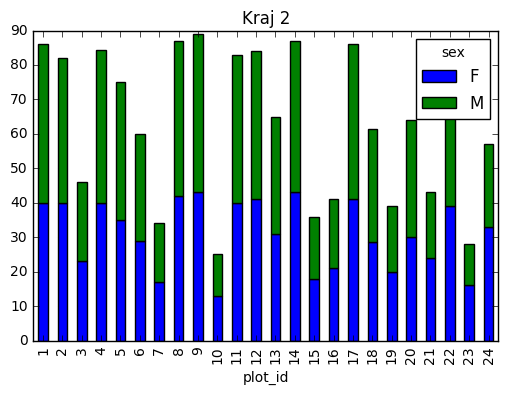

In [121]:
import pandas as pd
%matplotlib inline
surveys_df = pd.read_csv("https://ndownloader.figshare.com/files/2292172")

# filter1= surveys_df[pd.isnull(surveys_df.weight)]]
noSEX= surveys_df[((surveys_df.sex == 'M') | (surveys_df.sex == 'F') & surveys_df.weight > 0)]
sexy= noSEX.groupby(['plot_id', 'sex']).median()['weight'].unstack()

grafikon = sexy.plot(kind='bar',stacked=True,title="Kraj 2")
grafikon